# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

**Imports**

In [1]:
import pandas as pd
from pycaret.classification import ClassificationExperiment

**Make DataFrame from cleaned CSV file**

In [2]:
df = pd.read_csv('cleaned_churn_data.csv', index_col='customerID')
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AvgCharge,NormalizedAvgCharge
customerID,,,,,,,,,
7590-VHVEG,1,0,0,0,29.85,29.85,0,29.85,3.396185
5575-GNVDE,34,1,1,1,56.95,1889.50,0,55.57,4.017643
3668-QPYBK,2,1,0,1,53.85,108.15,1,54.08,3.990464
7795-CFOCW,45,0,1,2,42.30,1840.75,0,40.91,3.711375
9237-HQITU,2,1,0,0,70.70,151.65,1,75.82,4.328362
...,...,...,...,...,...,...,...,...,...
6840-RESVB,24,1,1,1,84.80,1990.50,0,82.94,4.418117
2234-XADUH,72,1,1,3,103.20,7362.90,0,102.26,4.627519
4801-JZAZL,11,0,0,0,29.60,346.45,0,31.50,3.449988


Again, there is an issue with some values in the engineered features completed in week 2 ("AvgCharge" and "NormalizedCharge"), they are unneeded, so we will drop the columns.

The "PhoneService" has also proven to not be particularly helpful in previous analysis.

In [3]:
df.drop(['AvgCharge', 'NormalizedAvgCharge', 'PhoneService'], axis='columns', inplace=True)
df

,tenure,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,
7590-VHVEG,1,0,0,29.85,29.85,0
5575-GNVDE,34,1,1,56.95,1889.50,0
3668-QPYBK,2,0,1,53.85,108.15,1
7795-CFOCW,45,1,2,42.30,1840.75,0
9237-HQITU,2,0,0,70.70,151.65,1
...,...,...,...,...,...,...
6840-RESVB,24,1,1,84.80,1990.50,0
2234-XADUH,72,1,3,103.20,7362.90,0
4801-JZAZL,11,0,0,29.60,346.45,0




**Run Classification Experiment using Pykaret**

In [4]:
churn_autoML = ClassificationExperiment()
churn_autoML.setup(df, target='Churn')

,Description,Value
0,Session id,1622
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7043, 6)"
4,Transformed data shape,"(7043, 6)"
5,Transformed train set shape,"(4930, 6)"
6,Transformed test set shape,"(2113, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


**Run Model Comparison**

In [5]:
top_model = churn_autoML.compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.7282,0.8189,0.7813,0.4926,0.6041,0.4130,0.4387,0.0100
nb,Naive Bayes,0.7209,0.8069,0.7645,0.4839,0.5925,0.3963,0.4204,0.0100
lightgbm,Light Gradient Boosting Machine,0.7884,0.8259,0.5145,0.6239,0.5629,0.4253,0.4293,0.4180
gbc,Gradient Boosting Classifier,0.7911,0.8352,0.4969,0.6361,0.5575,0.4236,0.4293,0.0920
lr,Logistic Regression,0.7884,0.8290,0.5000,0.6293,0.5564,0.4199,0.4253,0.9570
ada,Ada Boost Classifier,0.7919,0.8356,0.4931,0.6416,0.5563,0.4236,0.4307,0.0450
lda,Linear Discriminant Analysis,0.7880,0.8173,0.4923,0.6302,0.5518,0.4159,0.4219,0.0110
rf,Random Forest Classifier,0.7757,0.7996,0.4862,0.5960,0.5350,0.3892,0.3931,0.1210
et,Extra Trees Classifier,0.7586,0.7754,0.4939,0.5523,0.5209,0.3603,0.3617,0.0920
ridge,Ridge Classifier,0.7870,0.0000,0.4304,0.6503,0.5171,0.3878,0.4019,0.0090


Upon viewing results, we must consider which scoring metric will be used to identify the "Best" model.

I decided on using the F1 score, after viewing sample prediction scores below.
     
**The Preferred model by F1 score is Quadratic Discriminant Analysis**

In [6]:
top_model

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

**Lets take a deeper look.**

In [7]:
churn_autoML.evaluate_model(top_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

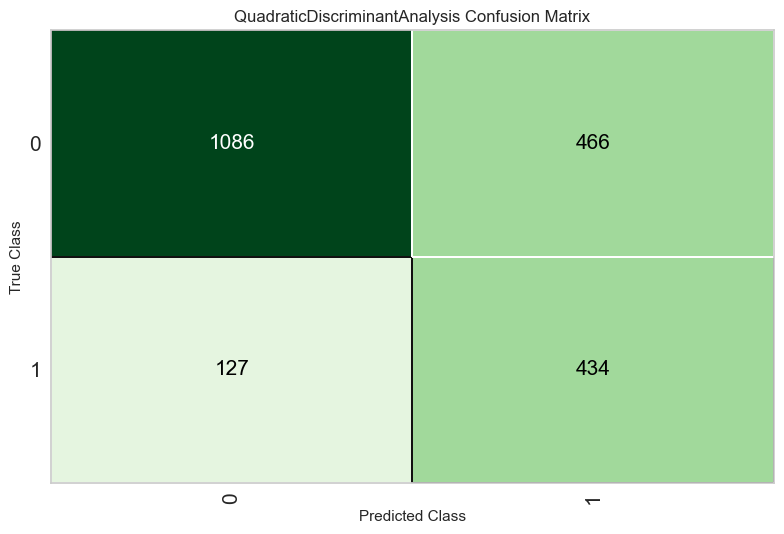

In [8]:
churn_autoML.plot_model(top_model, plot= 'confusion_matrix')

**Now to make some Predictions using the Model**

In [ ]:
churn_predictions = churn_autoML.predict_model(top_model, data=df)

In [ ]:
churn_predictions.sample(25)

**Finally, we save the trained model to a Pickle file**

In [ ]:
churn_autoML.save_model(top_model, 'churn_prediction_model')

**Next, we created an ML pipeline processing file called: "churn_predictions" that produces a list of customer IDs and their chance to churn according to the predictive model, and saved it to a public Github Repo.**

We used the Pycharm IDE v2023.2.1 with GitHub integration to create a local Repo and push it to Github with the GitHub desktop client for Mac.

It ran great in the IDE, how about running it from the same location as this notebook?

In [10]:
%run churn_predictions.py

Transformation Pipeline and Model Successfully Loaded
Predictions:
customerID
7590-VHVEG    0.7237
5575-GNVDE    0.9788
3668-QPYBK    0.7364
7795-CFOCW    0.9995
9237-HQITU    0.9126
               ...  
6840-RESVB    0.6275
2234-XADUH    0.9230
4801-JZAZL    0.8082
8361-LTMKD    0.9082
3186-AJIEK    0.9997
Name: churn_probability, Length: 7043, dtype: float64


**link to GitHub Repo: https://github.com/MBass-ador/Churn_Predictions**

# Summary

Lots of troubleshooting this week.  

Once I got everything working correctly, everything was straightforward:  

The data was loaded from the previously cleaned dataset and unneeded columns were dropped.  

Then, using pycaret, competing models were compared to inform the choice of ranking metric and ultimately to pick the best performing model.

The selected model was saved to a pickle file.

Next, a data processing pipeline that leveraged this saved model was built as a python file.

Finally, all project materials were saved to a public GitHub repository.

With relatively minor modification, this pipeline script and saved model could serve as a tool for amateur data scientists to explore different data sets (you'd really script the model selection process as well, and allow users to specify data files, choose their features and maybe supply handling for both csv and excel files).  